# Scientific Computing: Assignment Set 3
_Boyan Mihaylov (15067602)_

## 0. Imports / Preliminaries

In [69]:
import numpy as np
from importlib import reload

The module `solvers.py` contains functions for PDE solving and the module `vis_tools.py` contains visualisation functions.

In [74]:
import solvers as sv
import vis_tools as vis

## 1. Eigenmodes of Vibrating Membranes

The waves occuring in the transverse vibration of tensioned elastic membranes, such as drums, are known to resonate in specific patterns determined by the eigenmodes and eigenfrequencies of the system. These characteristics are heavily dependent on the shape of the membrane's boundary. The first experiment explores this dependence by formulating a discrete model for solving the eigenvalue problem for membranes with different boundary geometries.

The vibrations of the membrane are governed by the wave equation:

$$
\frac{\partial^2u}{\partial t^2}=c^2\nabla^2{u},\tag{1}
$$

where $u$ is the amplitude of the transverse wave.

### 1.2. Discretisation of the System

The procedure to transform this equation into an eigenvalue problem involves a separation of variables, requiring the decomposition of the amplitude into a purely space-dependent and a purely time-dependent term:

$$
u(x,y,t)=v(x,y)T(t).
$$

This asserted formulation can be substituted into (1), yielding the equation

$$
\frac{1}{c^2T(t)}\frac{\partial^2T(t)}{\delta{t}^2}=\frac{1}{v(x,y)}\nabla^2{v(x,y)}.\tag{2}
$$

With the $t$-dependent and the $(x,y)$-dependent variables separated in the two sides of the equation, it can be stated that the common value of the two sides is a constant, $K$. Expressing the left side through $K$ yields

$$
\frac{\partial^2T(t)}{\delta{t}^2}=Kc^2T(t),
$$

which has an oscillating solution for $K < 0$, dependent on the eigenfrequency $\lambda$:

$$
T(t) = A\cos(c\lambda t) + B\sin(c\lambda t).
$$

$\lambda$ is positive and real under $K\in\mathbb{R}$, as it obeys the relationship $\lambda^2=-K$. The solutions for $K=0$ and $K<0$ exhibit a static behaviour under fixed boundary conditions and an exponential growth/decay, respectively.

The expression relevant for the eigenvalue problem is the right side of (2), expressed through $K$:

$$
\nabla^2{v(x,y)}=Kv(x,y)\tag{3},
$$

as it can be written in the form $\bm{M}\bm{v}=K\bm{v}$, where $\bm{v}$ is the vector of amplitudes $v(x,y)$, $K$ is a scalar constant and $\bm{M}$ is derived from the finite difference approximation of the Laplacian term:

$$
\nabla^2{v(x,y)}\approx \frac{1}{\delta{x}^2}\left[v(x+\delta{x}, y)+v(x-\delta{x},y)+v(x,y+\delta{x})+v(x,y-\delta{x})-4v(x,y)\right],
$$

assuming that $\delta{x}\equiv\delta{y}$. Representing the system through a discrete rectangular lattice of size $N_x \times N_y$, the matrix $\bm{M}$ is constructed from the neighbour coefficients in the finite difference scheme for the amplitude at each lattice point, $v_i$. The index $i=\{0,\ldots,N_x \times N_y\}$ follows the flattened row-wise order of the lattice elements, such that $i=jN_x + k$, with $j=\{0,\ldots, N_y\}, k=\{0,\ldots,N_x\}$. Since the factor $\frac{1}{\delta{x}^2}$ does not influence the eigenvalues of $\bm{M}$, it can be disregarded. Eq. (3) can thus be expressed as:

$$
v_{(j+1)N_x + k}+v_{(j-1)N_x+k}+v_{jN_x+k+1}+v_{jN_x + k-1}-4v_{jN_x+k}=Kv_{jN_x+k}.
$$

The left side of the equation indicates which coefficients $q_i$ contained in the rows of $\bm{M}$ to set to a non-zero value, namely the ones corresponding to the observed site ($q_{jN_x+k}=-4$) and its top, bottom, left and right neighbours ($q_{(j+1)N_x + k}=q_{(j-1)N_x+k}=q_{jN_x+k+1}=q_{jN_x + k-1}=1$).

As the boundary is considered fixed, a Dirichlet boundary condition imposes a constant $v(x,y)=0$ at the edges. To prevent the boundaries from updating, all neighbour coefficients for the boundary sets are set to zero ($q_{(j+1)N_x + k}=q_{(j-1)N_x+k}=q_{jN_x+k+1}=q_{jN_x + k-1}=0$ for $j=\{0, N_y\}$, $k=\{0, N_x\}$).

The following procedure demonstrates the construction of $\bm{M}$ from an input size $N_x\times N_y$ and visualises the indexing of the lattice as well as the resulting matrix of coefficients. In the example, the dimensions are set to $N_x=N_y=4$.

In [136]:
reload(vis)

<module 'vis_tools' from 'd:\\Msc Computational Science\\S02P01\\Scientific Computing\\GitHub\\scented-candles\\Assignment Set 3\\vis_tools.py'>

[[-4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -4.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -4.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -4.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -4.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -4.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -4. 

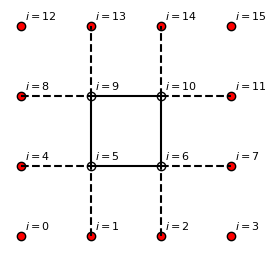

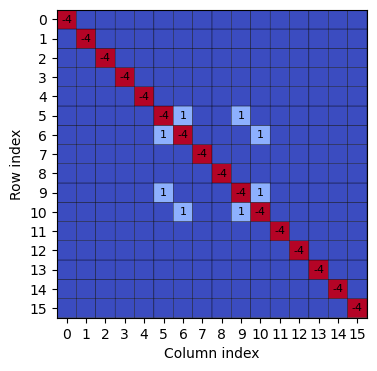

In [137]:
size_x = 4
size_y = 4

coeffs_matrix = sv.construct_coeff_matrix(size_x, size_y)

print(coeffs_matrix)

vis.plot_lattice_topology(size_x, size_y)
vis.plot_coeff_matrix(coeffs_matrix)

In the first plot above, the fixed boundary sites with $v(x,y)=0$ are shown as red dots. The continuous lines represent a two-way relationship in the update functions of two neighbours, whereas dashed lines represent a one-sided relationship: only the non-boundary sites refer to the boundary sites and not vice versa. The second plot illustrates the matrix of coefficients, with the indices along each axis corresponding to $i$ in the first plot.